In [1]:
# textblob
# VADER
# flair

# TextBlob 

* part-of-speech tagging
* noun phrase extraction
* sentiment analysis
* classification, translation, and more.

In [2]:
from textblob import TextBlob

In [4]:
testimonial = TextBlob('The food was great')

In [5]:
testimonial.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [6]:
testimonial = TextBlob('The food was very bad!')

In [7]:
testimonial.sentiment

Sentiment(polarity=-1.0, subjectivity=0.8666666666666667)

In [9]:
testimonial = TextBlob("I do not know how the food is")
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [10]:
testimonial = TextBlob('Sherlock holmes book is a good read. But not everyone will enjoy it')
testimonial.sentiment

Sentiment(polarity=0.55, subjectivity=0.55)

In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/aps0611/MLP/main/sentiment_analysis_data.csv')

In [15]:
data.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [86]:
# A bigram or digram is a sequence of two adjacent elements from a string of tokens, 
# typically letters, syllables, or words
# a way to get some context
data.shape

(5842, 2)

A `token` is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing.

In [18]:
# 1. This is a good book. This book is worth reading
# 2. This book is useless
# 3. THis book is not bad

## CountVectorizer

|This | is | a | good | book | worth | reading | useless | not | bad|
|-----|----|---|------|------|-------|---------|---------|-----|----|
|2|2|1|1|2|1|1|0|0|0|
|1|1|0|0|1|0|0|1|0|0|
|1|1|0|0|1|0|0|0|1|1|


#### problems
1. The features are huge
2. problem in case of less memory capabilities
3. if feature has more value more is the weightage but `This` `is` are `a` are not important to me

## Hashing Vectorizer:

For every data, a function will be applied- `Murmurhash3` # sklearn

## TfidfVectorizer

Term Frequency Inverse Document Frequency

$TF(t, d) = # No. of times term t appears in document d$

inverse document frequency
$IDF = #LOG(Total number of documents/(1 + no. of documents word is appearing))$ 

TF * IDF will give fractions

In [21]:
# divide data into X and Y
X = data['Sentence']
y = data['Sentiment']

In [22]:
# check the unique classes in the dataset
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [24]:
# check for missing values
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [26]:
y.value_counts() # imbalanced data

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

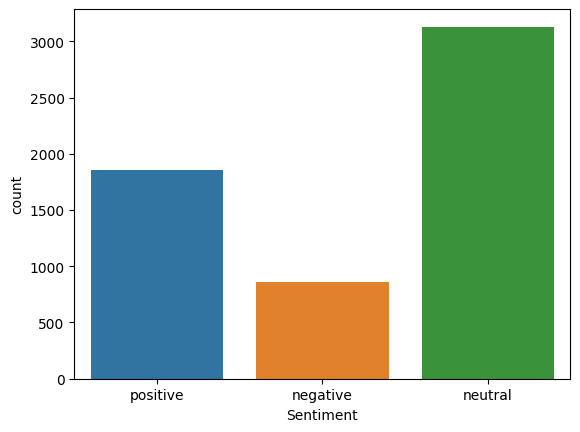

In [27]:
import seaborn as sns
sns.countplot(x=y)

In [32]:
# word cloud:

positive_data = data[data['Sentiment'] == 'positive']

In [33]:
positive_data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
10,Circulation revenue has increased by 5 % in Fi...,positive
...,...,...
5819,Last month we added to our $GILD position and ...,positive
5824,`` In the newly formed company YIT Stavo the l...,positive
5825,Friends Life lifts profits 38% and hikes divi ...,positive
5836,Daily Mail parent company in talks with potent...,positive


In [34]:
# word cloud:

from wordcloud import WordCloud
wc = WordCloud().generate(str(positive_data['Sentence']))

(-0.5, 399.5, 199.5, -0.5)

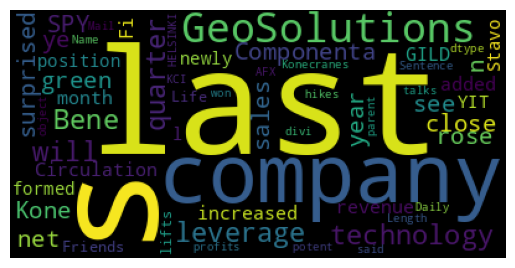

In [37]:
import matplotlib.pyplot as plt
plt.imshow(wc);
plt.axis('off')

In [38]:
negative_data = data[data['Sentiment'] == 'negative']
negative_data

,Sentence,Sentiment
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
11,$SAP Q1 disappoints as #software licenses down...,negative
39,$AAPL afternoon selloff as usual will be bruta...,negative
...,...,...
5829,"$SBUX down PM, from $DB downgrade.. PT cut fro...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative


In [41]:
from wordcloud import WordCloud
wc = WordCloud().generate(str(negative_data['Sentence']))

(-0.5, 399.5, 199.5, -0.5)

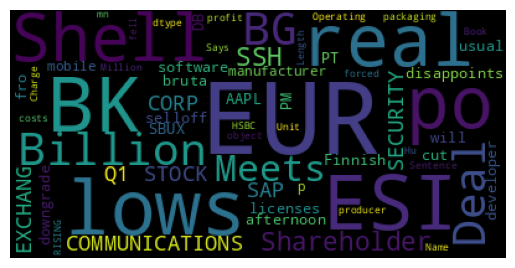

In [42]:
import matplotlib.pyplot as plt
plt.imshow(wc);
plt.axis('off')

In [43]:
neutral_data = data[data['Sentiment'] == 'neutral']
neutral_data

,Sentence,Sentiment
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
9,The Stockmann department store will have a tot...,neutral
13,Viking Line has canceled some services .,neutral
14,Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...,neutral
...,...,...
5833,"In 2008 , Kemira recorded revenue of approxima...",neutral
5834,Investments in product development stood at 6....,neutral
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


In [44]:
from wordcloud import WordCloud
wc = WordCloud().generate(str(neutral_data['Sentence']))

(-0.5, 399.5, 199.5, -0.5)

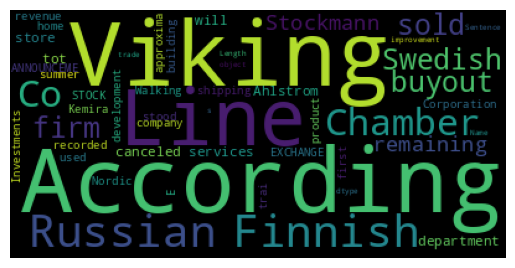

In [45]:
import matplotlib.pyplot as plt
plt.imshow(wc);
plt.axis('off')

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vec = CountVectorizer(stop_words = 'english')

In [49]:
X_vec = vec.fit_transform(X)

In [50]:
X_vec

<5842x11126 sparse matrix of type '<class 'numpy.int64'>'
	with 65768 stored elements in Compressed Sparse Row format>

In [52]:
X_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
X_vec.shape

(5842, 11126)

In [59]:
len(vec.vocabulary_)

11126

In [87]:
vec.vocabulary_['netflix'] # gives location of vikingf

6882

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec,y, 
                                                    test_size = 0.25,
                                                    random_state = 5)

In [74]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [75]:
# data is imbalanced so accuracy is not a good metrics
MNB.score(X_test, y_test)

0.6878850102669405

In [77]:
from sklearn.metrics import confusion_matrix
y_pred = MNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

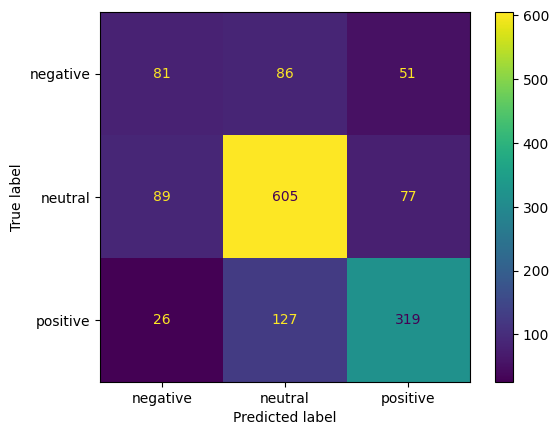

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = MNB.classes_).plot()

In [80]:
sample = 'The company XYZ did not perform well in first quarter. Its sales have been declining'
# transform expects matrix so we need to pass matrix= [sample]
sample_vec = vec.transform([sample])

In [81]:
MNB.predict(sample_vec)

array(['neutral'], dtype='<U8')

In [82]:
# sentiment should have been negative but we are getting neutral
# model is performing badly for the negative sentiment. Also the sample size of negative samples is less can be a reason why its learning is not good

In [83]:
sample2 = 'The growth rate of the company is good. Also, the share prices are increasing'
sample2_vec = vec.transform([sample2])
MNB.predict(sample2_vec)

array(['positive'], dtype='<U8')

In [84]:
MNB.score(X_train, y_train)

0.8557406984706688

In [85]:
MNB.score(X_test, y_test)

0.6878850102669405

In [88]:
X_test.shape

(1461, 11126)

In [89]:
127+86

213

In [91]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(X_train, y_train)

ComplementNB()

In [92]:
CNB.score(X_train, y_train)

0.8561972152476603

In [93]:
CNB.score(X_test, y_test)

0.6618754277891855

In [94]:
# complement and mnb both give almost same accuracy

In [ ]:
# Will need to try balancing the dataset